<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1bXgaJRh4naJOGzE_Li2k50TN0kOPJdNhMtHl6H4t3Lk/edit).**

In [137]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

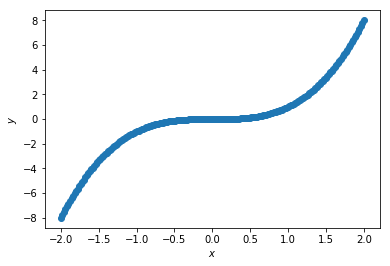

In [135]:
X = np.linspace(-2, 2, 200)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

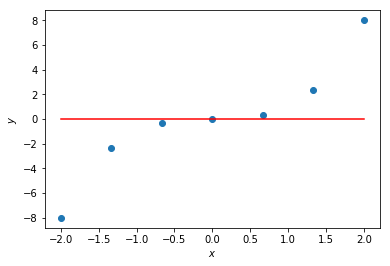

In [133]:
# Ваш код здесь
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

plt.plot([-2, 2], [0,0], "r");

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

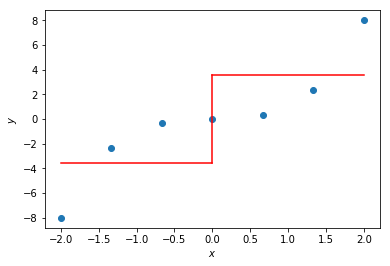

In [97]:
# Ваш код здесь
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

plt.plot([-2, 0], [y[y < 0].mean(), y[y < 0].mean()], "r")
plt.plot([0, 2], [y[y > 0].mean(), y[y > 0].mean()], "r")
plt.plot([0, 0], [y[y < 0].mean(),  y[y > 0].mean()], "r");

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [5]:
def regression_var_criterion(X, y, t):
    pass

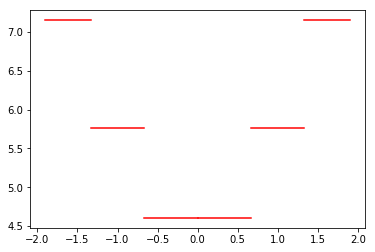

In [98]:
# Ваш код здесь

D = 1 / 7 * np.sum (((X[0:7]**3) - (X[0:7]**3) / 7) ** 2)

# слева - 1, справа - 6
D0_left = 0 
D0_right = 1 / len(X[1:7]) * np.sum (((X[1:7]**3) - (X[1:7]**3) / len(X[1:7])) ** 2)
Q0 = D - D0_left * (len(X[0:1]) / len(X[0:7])) - D0_right * (len(X[1:7]) / len(X[0:7]))

# слева - 2, справа - 5
D1_left = 1 / len(X[0:2]) * np.sum (((X[0:2]**3) - (X[0:2]**3) / len(X[0:2])) ** 2) 
D1_right = 1 / len(X[2:7]) * np.sum (((X[2:7]**3) - (X[2:7]**3) / len(X[2:7])) ** 2)
Q1 = D - D1_left * (len(X[0:2]) / len(X[0:7])) - D1_right * (len(X[2:7]) / len(X[0:7]))

# слева - 3, справа - 4
D2_left = 1 / len(X[0:3]) * np.sum (((X[0:3]**3) - (X[0:3]**3) / len(X[0:3])) ** 2) 
D2_right = 1 / len(X[3:7]) * np.sum (((X[3:7]**3) - (X[3:7]**3) / len(X[3:7])) ** 2)
Q2 = D - D2_left * (len(X[0:3]) / len(X[0:7])) - D2_right * (len(X[3:7]) / len(X[0:7]))


# слева - 4, справа - 3
D3_left = 1 / len(X[0:4]) * np.sum (((X[0:4]**3) - (X[0:4]**3) / len(X[0:4])) ** 2) 
D3_right = 1 / len(X[4:7]) * np.sum (((X[4:7]**3) - (X[4:7]**3) / len(X[4:7])) ** 2)
Q3 = D - D3_left * (len(X[0:4]) / len(X[0:7])) - D3_right * (len(X[4:7]) / len(X[0:7]))


plt.plot([-1.9, X[1]], [Q0, Q0], "r")
plt.plot([X[1], X[2]], [Q1, Q1], "r")
plt.plot([X[2], X[3]], [Q2, Q2], "r")
plt.plot([X[3], X[4]], [Q3, Q3], "r")
plt.plot([X[4], X[5]], [Q1, Q1], "r")
plt.plot([X[5], 1.9], [Q0, Q0], "r");

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- **Да**
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

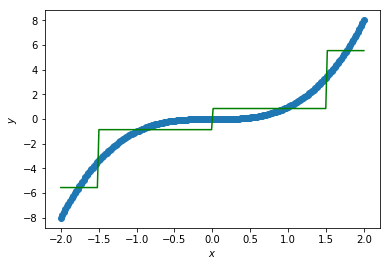

In [163]:
# Ваш код здесь
X = np.linspace(-2, 2, 200)
y = X ** 3

plt.scatter(X, y)

X_1 = X[X < -1.5]
y_1 = [y[X < -1.5].mean()] * X_1.shape[0]

X_2 = X[(X < 0) & (X >= -1.5)]
y_2 = [y[(X < 0) & (X >= -1.5)].mean()] * X_2.shape[0]

X_3 = X[(X >= 0) & (X < 1.5)]
y_3 = [y[(X >= 0) & (X < 1.5)].mean()] * X_3.shape[0]

X_4 = X[X >= 1.5]
y_4 = [y[X >= 1.5].mean()] * X_4.shape[0]

yy = np.r_[y_1, y_2, y_3, y_4]
XX = np.r_[X_1, X_2, X_3, X_4]

plt.plot(XX, yy, "g")

plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

# from sklearn.tree import DecisionTreeRegressor
# reg_tree = DecisionTreeRegressor(max_depth=2)
# reg_tree.fit(X, y)
# reg_tree_pred = reg_tree.predict(X)

# plt.figure(figsize=(10, 6))
# plt.scatter(X, y, c="b", s=20)
# plt.plot(X, reg_tree_pred, "g", lw=2)
# plt.xlim([-2, 2])

**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- **7**
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [47]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [13]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

In [45]:
# Ваш код здесь
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz


df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')
df['age_years'] = round(df['age'] / 365.25)

df = pd.get_dummies(df, prefix='chol', columns=['cholesterol'])
df = pd.get_dummies(df, prefix='gluc', columns=['gluc']);

df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50.0,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55.0,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,52.0,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48.0,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,48.0,1,0,0,1,0,0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [49]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X = df.drop(['cardio', 'age'], axis=1)
y = df['cardio']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

X.head()
# Ваш код здесь

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50.0,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55.0,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,52.0,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48.0,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,48.0,1,0,0,1,0,0


Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

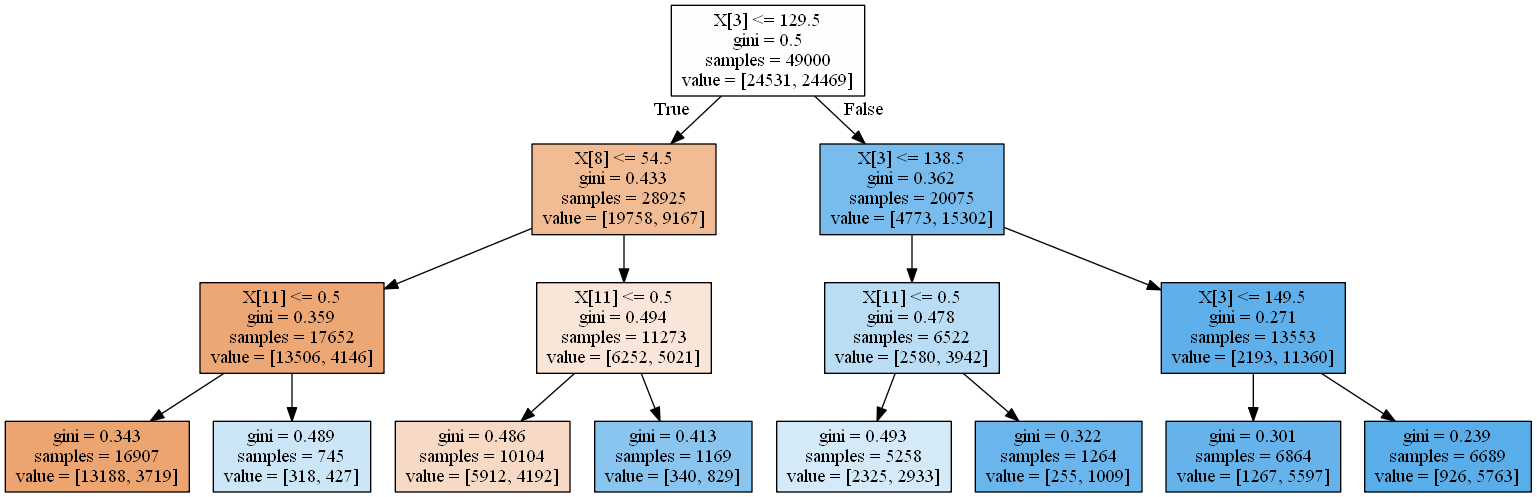

In [53]:
# Ваш код здесь

first_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
first_tree.fit(X_train, y_train)


from sklearn.tree import export_graphviz
import pydot
import pydotplus
from IPython.display import Image

export_graphviz(first_tree, out_file='../../img/small_tree.dot', filled=True)

graph = pydotplus.graphviz.graph_from_dot_file ("../../img/small_tree.dot")
Image(graph.create_png())


#________________________

# # используем .dot формат для визуализации дерева
# from sklearn.tree import export_graphviz
# export_graphviz(first_tree, 
# out_file='../../img/small_tree.dot', filled=True)
# # для этого понадобится библиотека pydot (pip install pydot)
# !dot -Tpng '../../img/small_tree.dot' -o '../../img/small_tree.png'

#________________________

# import pydot
# graph = pydot.graph_from_dot_file('img/tree.dot')
# graph.write_png('img/tree.png')

# from IPython.display import Image
# Image(filename='img/tree.png')


#________________________
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()
# export_graphviz(first_tree, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [52]:
X.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50.0,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55.0,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,52.0,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48.0,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,48.0,1,0,0,1,0,0


**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- **age, ap_hi, chol=3**

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [36]:
# Ваш код здесь

first_tree_pred = first_tree.predict(X_valid)
accuracy_score(y_valid, first_tree_pred)

0.72128571428571431

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [55]:
first_tree_params = {'max_depth': list(range(2, 11))}

first_tree_grid = GridSearchCV (first_tree, first_tree_params, cv=5, n_jobs=-1, verbose=True)

first_tree_grid.fit(X_train, y_train)

first_tree_grid.best_params_

first_tree_grid.best_score_

accuracy_score(y_valid, first_tree_grid.predict(X_valid))


# Ваш код здесь

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.9s finished


0.7264761904761905

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

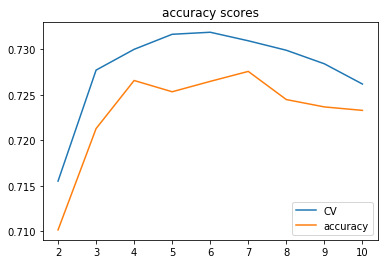

In [56]:
# Ваш код здесь
from sklearn.model_selection import cross_val_score

cv_scores, accuracy_scores = [], []
max_depth = range(2, 11)

for k in max_depth:

    k_max_depth = DecisionTreeClassifier (max_depth=k)
    cv_scores.append(np.mean(cross_val_score(k_max_depth, X_train, y_train, cv=5)))
    k_max_depth.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_valid, k_max_depth.predict(X_valid)))

plt.plot(max_depth, cv_scores, label='CV')
plt.plot(max_depth, accuracy_scores, label='accuracy')
plt.title('accuracy scores')
plt.legend();



Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [64]:
# Ваш код здесь

first_tree_params = {'max_depth': list(range(6, 7))}

first_tree_grid = GridSearchCV (first_tree, first_tree_params, cv=5, n_jobs=-1, verbose=True)

first_tree_grid.fit(X_train, y_train)

first_tree_grid.best_params_

first_tree_grid.best_score_

accuracy_score(y_valid, first_tree_grid.predict(X_valid));


(0.7264761904761905 - 0.72128571428571431) / 0.72128571428571431 * 1000

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


7.196144451046411

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- **да, нет**
- нет, да
- нет, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- **Верхнее артериальное давление от 140 до 160 (мм рт.ст.)**
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

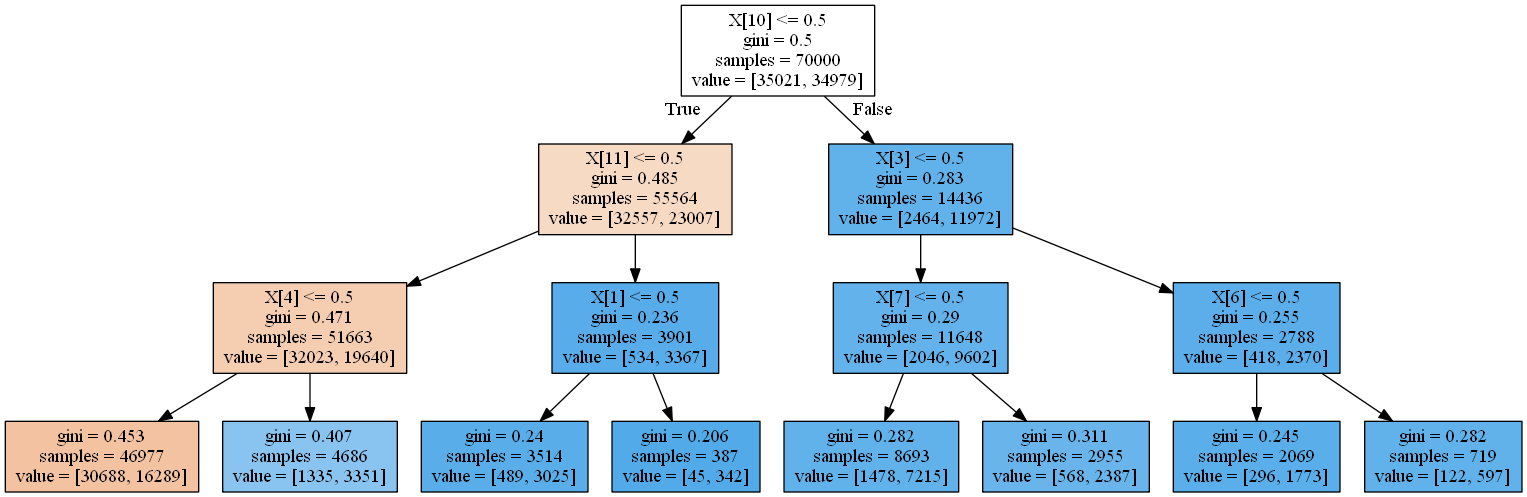

In [31]:
# Ваш код здесь

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz


df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')
df['age_years'] = round(df['age'] / 365.25)

df = pd.get_dummies(df, prefix='chol', columns=['cholesterol'])


df['age 45-50'] = np.where(df['age_years'].isin(list(range(45, 50))), 1, 0)
df['age 50-55'] = np.where(df['age_years'].isin(list(range(50, 55))), 1, 0)
df['age 55-60'] = np.where(df['age_years'].isin(list(range(55, 60))), 1, 0)
df['age 60-65'] = np.where(df['age_years'].isin(list(range(60, 65))), 1, 0)

df['ap_hi 120-140'] = np.where(df['ap_hi'].isin(list(range(120, 140))), 1, 0)
df['ap_hi 140-160'] = np.where(df['ap_hi'].isin(list(range(140, 160))), 1, 0)
df['ap_hi 160-180'] = np.where(df['ap_hi'].isin(list(range(160, 180))), 1, 0)


df = df.drop(['age', 'height', 'weight', 'ap_lo', 'gluc', 'active', 'alco', 'ap_hi', 'age_years'], axis=1)

df = df.rename(columns={'gender': 'male'})
df['male'] = df['male'].replace(to_replace=[1, 2], value=[0, 1])


from sklearn.model_selection import train_test_split, StratifiedKFold

X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0, random_state=17)


t5_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
t5_tree.fit(X_train, y_train)


from sklearn.tree import export_graphviz
import pydot
import pydotplus
from IPython.display import Image

export_graphviz(t5_tree, out_file='../../img/t5_tree.dot', filled=True)

graph = pydotplus.graphviz.graph_from_dot_file ("../../img/t5_tree.dot")
Image(graph.create_png())


In [156]:
14436 / 70000

0.20622857142857143